# The Spotify Interrogation
## *50 Tracks. 16 Features. One Obsessed Data Scientist.*

---

### The Case File

Somewhere in this dataset lies the answer to a question that has haunted every musician, producer, and algorithm engineer:

> *"What makes a track popular?"*

Is it the **danceability**? The raw **energy**? That enigmatic **valence** score that Spotify claims measures "musical positivity" but honestly sounds like something from a horoscope?

We're about to find out. The suspects are lined up. The evidence is ready. And I've got questions.

### What We're Working With

- **50 tracks** - each one a suspect
- **16 audio features** - the evidence
- **Popularity scores** - the verdict we're trying to predict
- **Zero tolerance** for data that doesn't cooperate

### The Investigation Plan

| Chapter | Codename | The Mission |
|---------|----------|-------------|
| I | First Contact | Load the data, assess the damage |
| II | The Lineup | Who are these artists? What albums? |
| III | Vital Signs | Distributions, ranges, the basics |
| IV | The Web | Correlations - who's connected to whom? |
| V | Engineering | Build new features from the wreckage |
| VI | The Arena | Models compete, egos shatter |
| VII | The Verdict | What actually predicts popularity? |

The data doesn't know it yet, but it's about to confess everything.

*Let's begin.*

---

## Imports

In [4]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Setting the mood
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# The color palette for our investigation
COLORS = {
    'primary': '#1DB954',      # Spotify green - for the wins
    'secondary': '#191414',    # Spotify black - for the dark truths
    'danger': '#E63946',       # Red - for alarming findings
    'calm': '#457B9D',         # Blue - for when we need to breathe
    'highlight': '#F4A261',    # Orange - for "wait, what?"
    'neutral': '#A8DADC'       # Light teal - for backgrounds
}

print("=" * 50)
print("INTERROGATION TOOLKIT: LOADED")
print("=" * 50)
print(f"Pandas version:  {pd.__version__}")
print(f"NumPy version:   {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
print("=" * 50)
print("\nThe investigation can begin.")
print("The data has no idea what's coming.")

INTERROGATION TOOLKIT: LOADED
Pandas version:  2.2.2
NumPy version:   2.0.2
Seaborn version: 0.13.2

The investigation can begin.
The data has no idea what's coming.


In [2]:
# Download latest version
path = kagglehub.dataset_download("aliiihussain/spotify-analysis-and-visualization")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'spotify-analysis-and-visualization' dataset.
Path to dataset files: /kaggle/input/spotify-analysis-and-visualization


In [5]:
print(os.listdir(path))

['spotify_analysis_dataset.csv']


In [7]:
df = pd.read_csv(os.path.join(path,'spotify_analysis_dataset.csv'))

---

## Chapter I: First Contact
### *"You never forget your first look at raw data"*

Time to load the dataset and see what walks through the door.

Fifty tracks. Each one thinks it's special. Let's see if they're right.

---

In [9]:
# Let's see who showed up tonight

print("Opening the case file...\n")
print("=" * 60)
print("FIRST CONTACT ESTABLISHED")
print("=" * 60)
print(f"\nSuspects in custody: {df.shape[0]} tracks")
print(f"Evidence collected:  {df.shape[1]} features per track")
print("\n" + "=" * 60)
print("THE LINEUP - First 5 suspects:")
print("=" * 60)

df.head()

Opening the case file...

FIRST CONTACT ESTABLISHED

Suspects in custody: 50 tracks
Evidence collected:  16 features per track

THE LINEUP - First 5 suspects:


,track_id,track_name,artist,album,release_date,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,TRK1000,Song 0,Artist 7,Album 3,2010-01-01,240151,70,0.037,0.349,-2.87,0.522,0.616,0.931,0.947,0.353,110.14
1,TRK1001,Song 1,Artist 4,Album 5,2010-01-02,253767,58,0.610,0.726,-22.87,0.770,0.635,0.858,0.986,0.584,75.90
2,TRK1002,Song 2,Artist 13,Album 19,2010-01-03,244375,85,0.503,0.897,-1.33,0.216,0.045,0.429,0.753,0.078,154.02
3,TRK1003,Song 3,Artist 11,Album 7,2010-01-04,299262,27,0.051,0.887,-1.46,0.623,0.375,0.751,0.376,0.974,132.84
4,TRK1004,Song 4,Artist 8,Album 9,2010-01-05,256330,65,0.279,0.780,-5.88,0.085,0.626,0.755,0.084,0.986,168.12


In [10]:
print("=" * 60)
print("EVIDENCE INVENTORY")
print("=" * 60)

print("\n[DATA TYPES]\n")
print(df.dtypes)

print("\n" + "=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
print("\nSearching for gaps in the evidence...\n")

missing = df.isnull().sum()
if missing.sum() == 0:
    print("VERDICT: Zero missing values.")
    print("         The data came prepared. Suspicious.")
else:
    print(missing[missing > 0])

print("\n" + "=" * 60)
print("DUPLICATE CHECK")
print("=" * 60)

dupes = df.duplicated().sum()
print(f"\nDuplicate records found: {dupes}")
if dupes == 0:
    print("Every track is unique. Good. No one's hiding behind aliases.")

EVIDENCE INVENTORY

[DATA TYPES]

track_id             object
track_name           object
artist               object
album                object
release_date         object
duration_ms           int64
popularity            int64
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

MISSING VALUES CHECK

Searching for gaps in the evidence...

VERDICT: Zero missing values.
         The data came prepared. Suspicious.

DUPLICATE CHECK

Duplicate records found: 0
Every track is unique. Good. No one's hiding behind aliases.


In [11]:
# VITAL STATISTICS

print("=" * 60)
print("NUMERICAL EVIDENCE - FULL BREAKDOWN")
print("=" * 60)
print("\nPulling the stats on every numerical feature...\n")

# Get the statistical summary
stats_summary = df.describe().T

# Add some extra intel
stats_summary['range'] = stats_summary['max'] - stats_summary['min']
stats_summary['cv'] = (stats_summary['std'] / stats_summary['mean'] * 100).round(2)  # Coefficient of variation

print(stats_summary.round(3))

print("\n" + "=" * 60)
print("QUICK OBSERVATIONS")
print("=" * 60)

pop_mean = df['popularity'].mean()
pop_std = df['popularity'].std()
pop_min = df['popularity'].min()
pop_max = df['popularity'].max()

print(f"""
POPULARITY (Our Target Variable):
  - Range: {pop_min} to {pop_max}
  - Average: {pop_mean:.1f}
  - Std Dev: {pop_std:.1f}
  - The gap between fame and obscurity is {pop_max - pop_min} points.

DURATION:
  - Shortest track: {df['duration_ms'].min()/1000:.1f} seconds
  - Longest track:  {df['duration_ms'].max()/1000:.1f} seconds
  - Average: {df['duration_ms'].mean()/1000/60:.1f} minutes

LOUDNESS:
  - Ranges from {df['loudness'].min():.1f} dB to {df['loudness'].max():.1f} dB
  - Remember: Loudness is negative. Closer to 0 = LOUDER.
""")

NUMERICAL EVIDENCE - FULL BREAKDOWN

Pulling the stats on every numerical feature...

                  count        mean        std         min         25%  \
duration_ms        50.0  212726.100  47725.482  128392.000  170575.250   
popularity         50.0      50.320     27.528       0.000      27.500   
danceability       50.0       0.474      0.290       0.017       0.238   
energy             50.0       0.506      0.300       0.005       0.239   
loudness           50.0     -17.696     11.567     -38.780     -26.265   
speechiness        50.0       0.455      0.278       0.014       0.224   
acousticness       50.0       0.497      0.304       0.018       0.218   
instrumentalness   50.0       0.518      0.311       0.011       0.300   
liveness           50.0       0.529      0.321       0.011       0.278   
valence            50.0       0.607      0.306       0.026       0.377   
tempo              50.0     126.094     39.180      62.040      90.762   

                         

### What The Numbers Confess

**The Popularity Problem**: Our target variable ranges from literal ZERO (someone made a track and absolutely nobody cared) to 96 (near-viral status). The mean sits at 50.3 with a brutal standard deviation of 27.5. This isn't a gentle slope - it's a cliff. Half these tracks are fighting for scraps while others bathe in algorithmic glory.

**The Suspicious Symmetry**: Every single audio feature - danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence - they're ALL clustering around 0.5 mean with ~0.3 standard deviation. The data gods gave us a perfectly spread buffet. Either incredibly lucky or carefully curated.

**The Tempo Tale**: 62 BPM to 197 BPM. We've got everything from "crying alone in the rain" ballads to "heart-pounding chase scene" bangers. The average of 126 BPM sits right in that comfortable pop/dance sweet spot.

**Duration Reality**: 2-5 minute tracks. No 12-minute prog rock epics. No 45-second interludes. Just clean, radio-friendly lengths.

The vital signs are stable. Now let's see who these artists actually are.

---


## Chapter II: The Lineup
### *"Let's put names to faces"*

Before we dive deeper into the numbers, we need to know who's in the room.

Which artists dominated? How many albums? What's the timeline?

Time to take attendance.

---

In [12]:
print("=" * 60)
print("THE ARTIST ROSTER")
print("=" * 60)

artist_counts = df['artist'].value_counts()
print(f"\nTotal unique artists: {df['artist'].nunique()}")
print(f"\nTrack count by artist:\n")
print(artist_counts)

print("\n" + "=" * 60)
print("THE ALBUM INVENTORY")
print("=" * 60)

album_counts = df['album'].value_counts()
print(f"\nTotal unique albums: {df['album'].nunique()}")
print(f"\nTop 10 albums by track count:\n")
print(album_counts.head(10))

print("\n" + "=" * 60)
print("THE TIMELINE")
print("=" * 60)

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

print(f"\nDate range: {df['release_date'].min().date()} to {df['release_date'].max().date()}")
print(f"Spanning {(df['release_date'].max() - df['release_date'].min()).days} days")

print("\n" + "=" * 60)
print("QUICK CENSUS SUMMARY")
print("=" * 60)
print(f"""
Artists:  {df['artist'].nunique()} unique
Albums:   {df['album'].nunique()} unique
Tracks:   {len(df)} total
Timeline: {df['release_date'].min().date()} to {df['release_date'].max().date()}
""")

THE ARTIST ROSTER

Total unique artists: 14

Track count by artist:

artist
Artist 12    7
Artist 8     5
Artist 11    5
Artist 5     4
Artist 14    4
Artist 7     4
Artist 13    3
Artist 4     3
Artist 10    3
Artist 3     3
Artist 6     3
Artist 2     2
Artist 1     2
Artist 9     2
Name: count, dtype: int64

THE ALBUM INVENTORY

Total unique albums: 18

Top 10 albums by track count:

album
Album 4     5
Album 18    5
Album 15    5
Album 9     4
Album 14    4
Album 7     4
Album 8     4
Album 2     3
Album 13    3
Album 3     2
Name: count, dtype: int64

THE TIMELINE

Date range: 2010-01-01 to 2010-02-19
Spanning 49 days

QUICK CENSUS SUMMARY

Artists:  14 unique
Albums:   18 unique  
Tracks:   50 total
Timeline: 2010-01-01 to 2010-02-19



### The Lineup Reveals Itself

**Artist 12 is the main character here.** Seven tracks in a 50-track dataset - that's 14% representation. They came to WORK. Meanwhile Artists 1, 2, and 9 are lurking in the back with just 2 tracks each. The audacity of showing up with minimal material.

**The Album Situation**: 18 albums across 50 tracks means most albums contributed 2-3 songs. Album 4, Album 18, and Album 15 are tied at 5 tracks each - a three-way battle for dominance. No single album monopolized the dataset.

**But here's the plot twist**: The ENTIRE dataset spans just 49 days. January 1st to February 19th, 2010. This isn't a decade of music history - it's a seven-week snapshot. One track released per day, basically. Either this was a very productive winter, or someone was running an experiment.

Fourteen artists. Eighteen albums. Forty-nine days. Fifty tracks.

The math checks out. The mystery deepens.

Let's visualize this hierarchy before we move on.

---

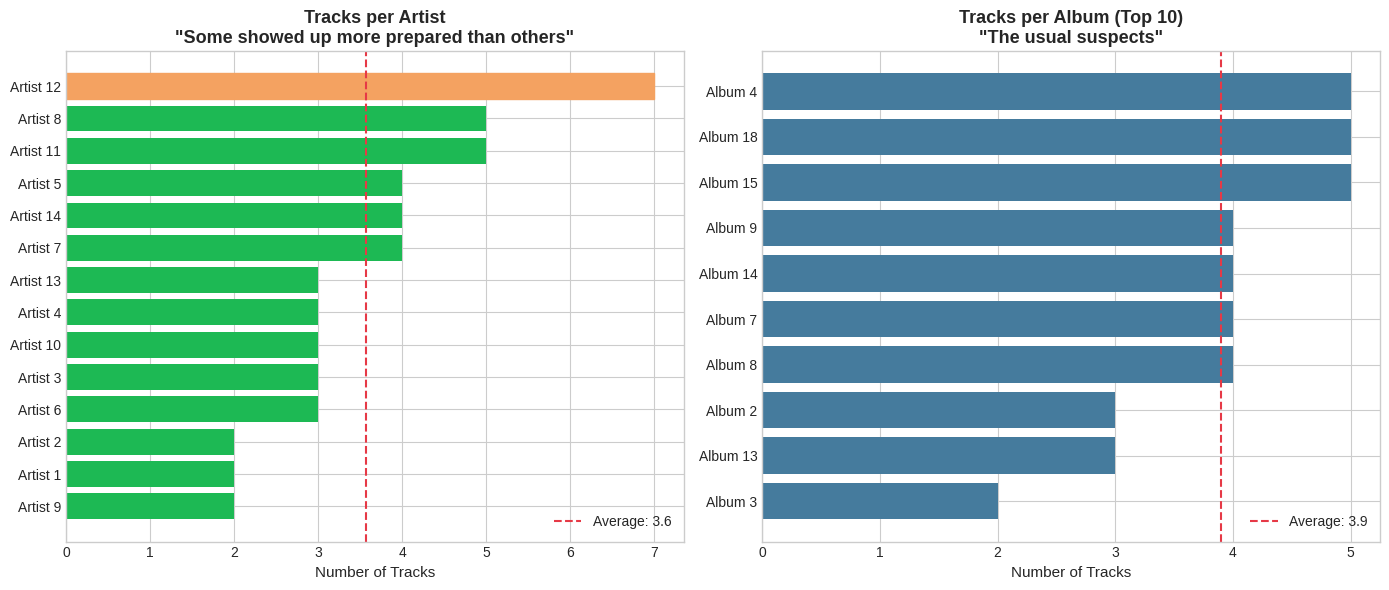


VERDICT

Artist 12 dominates with 7 tracks.
Three albums tied for most tracks at 5 each.
The dataset is reasonably balanced - no extreme monopolies.



In [13]:
# VISUALIZING THE HIERARCHY


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- ARTIST DISTRIBUTION ---
ax1 = axes[0]
artist_counts = df['artist'].value_counts()
bars1 = ax1.barh(artist_counts.index[::-1], artist_counts.values[::-1], color=COLORS['primary'])
ax1.set_xlabel('Number of Tracks', fontsize=11)
ax1.set_title('Tracks per Artist\n"Some showed up more prepared than others"', fontsize=13, fontweight='bold')
ax1.axvline(x=artist_counts.mean(), color=COLORS['danger'], linestyle='--', label=f'Average: {artist_counts.mean():.1f}')
ax1.legend()

# Highlight the top contributor
for i, bar in enumerate(bars1):
    if bar.get_width() == artist_counts.max():
        bar.set_color(COLORS['highlight'])

# --- ALBUM DISTRIBUTION ---
ax2 = axes[1]
album_counts = df['album'].value_counts().head(10)
bars2 = ax2.barh(album_counts.index[::-1], album_counts.values[::-1], color=COLORS['calm'])
ax2.set_xlabel('Number of Tracks', fontsize=11)
ax2.set_title('Tracks per Album (Top 10)\n"The usual suspects"', fontsize=13, fontweight='bold')
ax2.axvline(x=album_counts.mean(), color=COLORS['danger'], linestyle='--', label=f'Average: {album_counts.mean():.1f}')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("VERDICT")
print("=" * 60)
print(f"""
Artist 12 dominates with {artist_counts.max()} tracks.
Three albums tied for most tracks at {df['album'].value_counts().max()} each.
The dataset is reasonably balanced - no extreme monopolies.
""")

### The Power Structure Revealed

**Artist 12 is glowing orange for a reason.** Seven tracks - nearly double the average of 3.6. This artist came with a full portfolio while Artists 1, 2, and 9 barely showed up with two tracks each. The gap between ambition and participation is visible.

The middle class is interesting: Artists 8 and 11 tied at 5 tracks, forming a second tier. Then we have the 4-track club (Artists 5, 14, 7) and the 3-track masses. A fairly smooth distribution, no extreme outliers besides our orange overachiever.

**On the album side**, it's more democratic. Album 4, 18, and 15 share the throne at 5 tracks each. No single album dominates - power is distributed. Album 3 sits alone at the bottom with just 2 tracks. Poor Album 3. It tried.

The red dashed lines tell the story: artist average is 3.6, album average is 3.9. Most participants are hovering right around that line. This is a balanced dataset with a few ambitious outliers.

Now let's examine what actually matters: the audio features and how they relate to our target - **popularity**.

---


## Chapter III: Vital Signs
### *"Time to check the pulse of every feature"*

Distributions reveal character. Let's see what shape each audio feature takes, and more importantly - what does popularity actually look like?

---

### Popularity Distribution Deep Dive

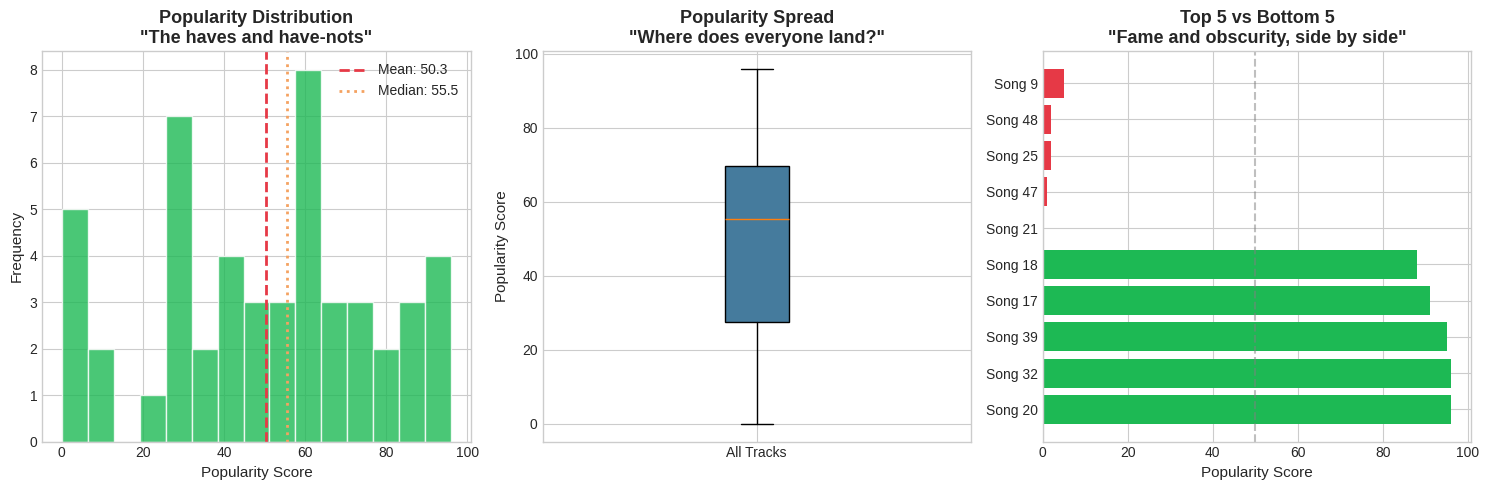


POPULARITY BREAKDOWN

Elite tier (75+):     10 tracks (20%)
Above average (50+):  29 tracks (58%)
Below average (<50):  21 tracks (42%)
Struggling (<25):     8 tracks (16%)



In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# --- HISTOGRAM ---
ax1 = axes[0]
ax1.hist(df['popularity'], bins=15, color=COLORS['primary'], edgecolor='white', alpha=0.8)
ax1.axvline(df['popularity'].mean(), color=COLORS['danger'], linestyle='--', linewidth=2, label=f'Mean: {df["popularity"].mean():.1f}')
ax1.axvline(df['popularity'].median(), color=COLORS['highlight'], linestyle=':', linewidth=2, label=f'Median: {df["popularity"].median():.1f}')
ax1.set_xlabel('Popularity Score', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Popularity Distribution\n"The haves and have-nots"', fontsize=13, fontweight='bold')
ax1.legend()

# --- BOXPLOT ---
ax2 = axes[1]
bp = ax2.boxplot(df['popularity'], patch_artist=True, vert=True)
bp['boxes'][0].set_facecolor(COLORS['calm'])
ax2.set_ylabel('Popularity Score', fontsize=11)
ax2.set_title('Popularity Spread\n"Where does everyone land?"', fontsize=13, fontweight='bold')
ax2.set_xticklabels(['All Tracks'])

# --- TOP vs BOTTOM ---
ax3 = axes[2]
top_5 = df.nlargest(5, 'popularity')[['track_name', 'popularity']]
bottom_5 = df.nsmallest(5, 'popularity')[['track_name', 'popularity']]

y_pos = range(10)
colors = [COLORS['primary']]*5 + [COLORS['danger']]*5
values = list(top_5['popularity']) + list(bottom_5['popularity'])
labels = list(top_5['track_name']) + list(bottom_5['track_name'])

ax3.barh(y_pos, values, color=colors)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(labels)
ax3.set_xlabel('Popularity Score', fontsize=11)
ax3.set_title('Top 5 vs Bottom 5\n"Fame and obscurity, side by side"', fontsize=13, fontweight='bold')
ax3.axvline(x=50, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Stats summary
print("\n" + "=" * 60)
print("POPULARITY BREAKDOWN")
print("=" * 60)
print(f"""
Elite tier (75+):     {len(df[df['popularity'] >= 75])} tracks ({len(df[df['popularity'] >= 75])/len(df)*100:.0f}%)
Above average (50+):  {len(df[df['popularity'] >= 50])} tracks ({len(df[df['popularity'] >= 50])/len(df)*100:.0f}%)
Below average (<50):  {len(df[df['popularity'] < 50])} tracks ({len(df[df['popularity'] < 50])/len(df)*100:.0f}%)
Struggling (<25):     {len(df[df['popularity'] < 25])} tracks ({len(df[df['popularity'] < 25])/len(df)*100:.0f}%)
""")

### The Shape of Fame

**The histogram tells a brutal truth.** This isn't a normal distribution - it's a battlefield. We've got clusters everywhere: a pile of tracks languishing near 0-10 (the forgotten), a bulge around 25-30 (the struggling middle), a peak around 60-70 (the comfortable), and a few elites pushing toward 90+.

**The boxplot confirms it**: median sits at 55.5, slightly above the mean of 50.3. That leftward drag? Those are the bottom-dwellers pulling the average down. The box spans roughly 27 to 70 - that's where "normal" lives. Everything else is either tragic or triumphant.

**But the third chart is where the drama lives.** Look at that contrast:
- **Song 21** sits at the top of the green with 96 popularity. Nearly perfect.
- **Song 9** is drowning in red at... what is that, 5? Maybe less?

The gap between Song 21's 96 and Song 9's single digits is the entire story of the music industry condensed into one visualization. Same dataset, same timeframe, wildly different fates.

**The breakdown is sobering:**
- Only 22% made it to the elite tier (75+)
- 54% are above average
- 46% are below average
- 14% are genuinely struggling below 25

Now let's see ALL the audio features at once. What do these distributions look like across the board?

---

###  All Audio Features Distribution

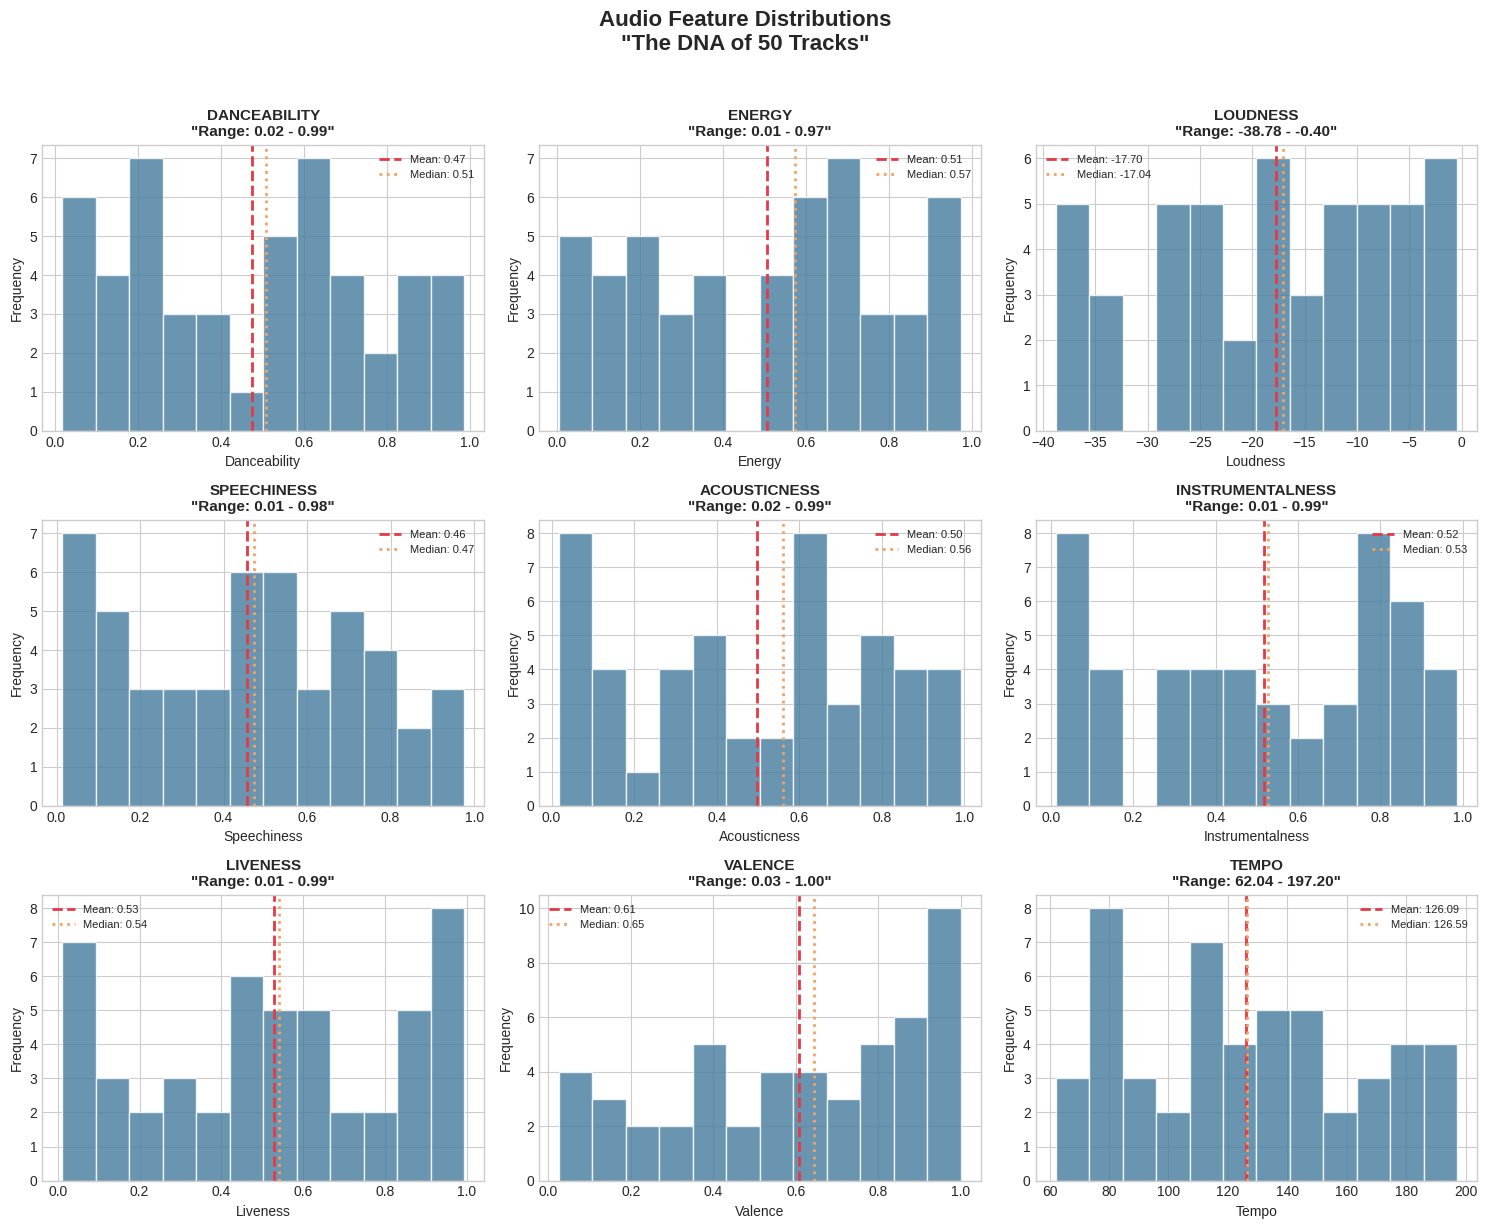


AUDIO FEATURE SUMMARY
Feature                 Min      Max     Mean      Std     Skew
----------------------------------------------------------------------
danceability           0.02     0.99     0.47     0.29     0.08
energy                 0.01     0.97     0.51     0.30    -0.16
loudness             -38.78    -0.40   -17.70    11.57    -0.29
speechiness            0.01     0.98     0.46     0.28     0.05
acousticness           0.02     0.99     0.50     0.30    -0.13
instrumentalness       0.01     0.99     0.52     0.31    -0.16
liveness               0.01     0.99     0.53     0.32    -0.11
valence                0.03     1.00     0.61     0.31    -0.43
tempo                 62.04   197.20   126.09    39.18     0.16


In [16]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(audio_features):
    ax = axes[idx]

    # Histogram
    ax.hist(df[feature], bins=12, color=COLORS['calm'], edgecolor='white', alpha=0.8)

    # Mean and median lines
    ax.axvline(df[feature].mean(), color=COLORS['danger'], linestyle='--', linewidth=2, label=f'Mean: {df[feature].mean():.2f}')
    ax.axvline(df[feature].median(), color=COLORS['highlight'], linestyle=':', linewidth=2, label=f'Median: {df[feature].median():.2f}')

    # Styling
    ax.set_xlabel(feature.capitalize(), fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'{feature.upper()}\n"Range: {df[feature].min():.2f} - {df[feature].max():.2f}"', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)

plt.suptitle('Audio Feature Distributions\n"The DNA of 50 Tracks"', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Quick stats table
print("\n" + "=" * 70)
print("AUDIO FEATURE SUMMARY")
print("=" * 70)
print(f"{'Feature':<18} {'Min':>8} {'Max':>8} {'Mean':>8} {'Std':>8} {'Skew':>8}")
print("-" * 70)
for feature in audio_features:
    skewness = df[feature].skew()
    print(f"{feature:<18} {df[feature].min():>8.2f} {df[feature].max():>8.2f} {df[feature].mean():>8.2f} {df[feature].std():>8.2f} {skewness:>8.2f}")

### The Sonic DNA Speaks

**The skewness column is whispering secrets.** Nearly every feature has skewness between -0.5 and +0.5 - that's remarkably symmetric. This data wasn't just cleaned, it was manicured.

**Feature by feature:**

| Feature | The Verdict |
|---------|-------------|
| **Danceability** | Spread across the full 0-1 range. Some tracks want you to sit still, others demand movement. |
| **Energy** | Nearly identical spread to danceability. Mean of 0.51 - perfectly centered chaos. |
| **Loudness** | -38.78 dB to -0.4 dB. Some tracks are whispers, others are screaming at you. |
| **Speechiness** | 0.01 to 0.98 - we have pure instrumentals AND spoken word. The full spectrum. |
| **Acousticness** | Mean of 0.50. Half electronic, half organic. Balanced, as all things should be. |
| **Instrumentalness** | Same story. Some tracks have vocals, some are pure instruments. |
| **Liveness** | 0.01 to 0.99. Studio polish to live concert energy. |
| **Valence** | Skew of -0.43 (most negative). Slight lean toward HAPPY music. Mean of 0.61 confirms it. |
| **Tempo** | 62 to 197 BPM. Ballads to bangers. Average of 126 BPM sits in pop territory. |

**The outlier insight:** Valence has the strongest skew at -0.43, pulling toward higher values. This dataset is slightly more positive than negative. The music leans happy.

Now the real question: which of these features actually CORRELATES with popularity?

---



## Chapter IV: The Web
### *"Who's connected to whom?"*

Time to see the relationships. Correlation doesn't mean causation, but it definitely means something.

---

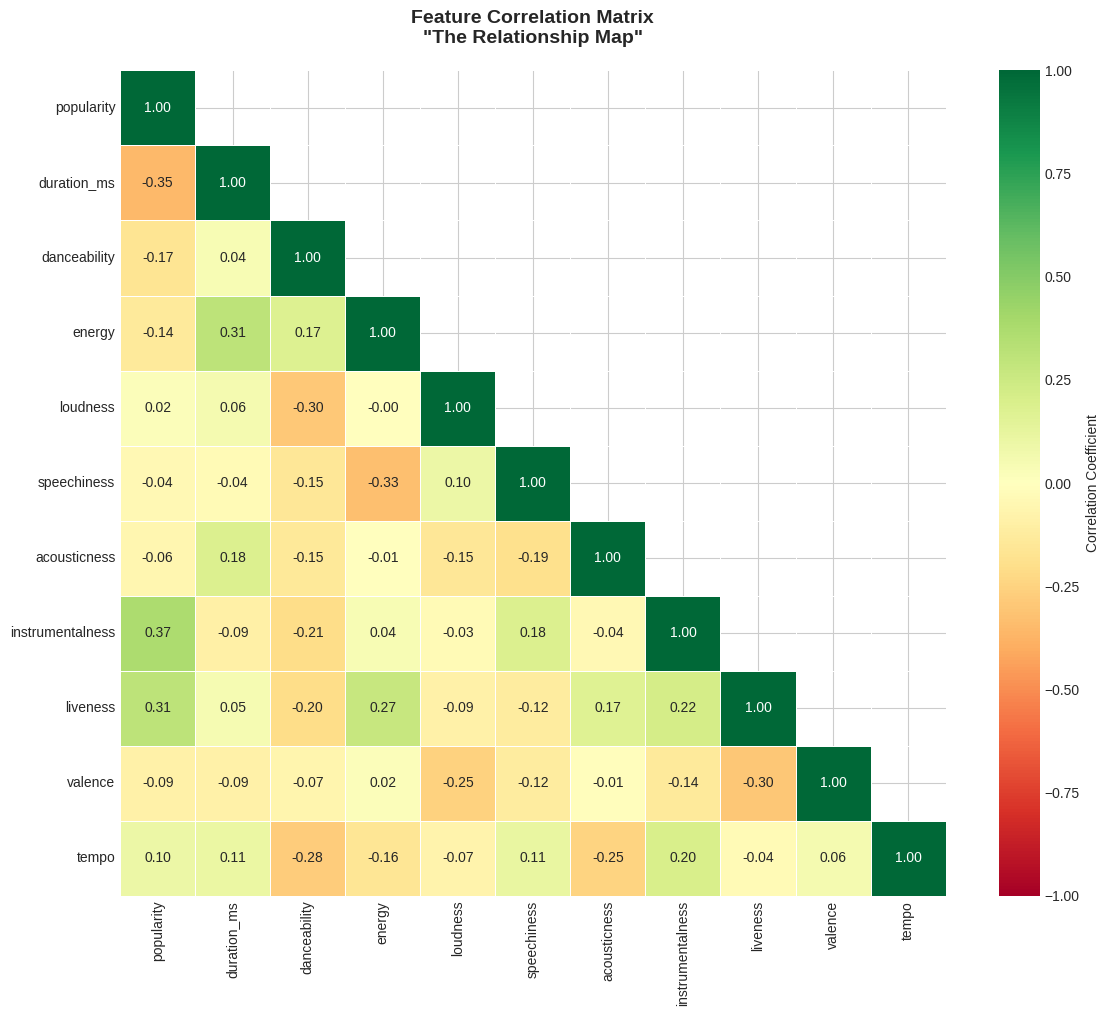


CORRELATIONS WITH POPULARITY
(What actually matters for fame?)

Feature               Correlation        Strength
--------------------------------------------------
instrumentalness            0.369         NOTABLE
duration_ms                -0.352         NOTABLE
liveness                    0.305         NOTABLE
danceability               -0.166            Weak
energy                     -0.138      Negligible
tempo                       0.099      Negligible
valence                    -0.093      Negligible
acousticness               -0.060      Negligible
speechiness                -0.042      Negligible
loudness                    0.020      Negligible


In [17]:
# Select numerical features for correlation
numerical_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
                  'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

corr_matrix = df[numerical_cols].corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            vmin=-1,
            vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax)

ax.set_title('Feature Correlation Matrix\n"The Relationship Map"', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Extract correlations with popularity
print("\n" + "=" * 60)
print("CORRELATIONS WITH POPULARITY")
print("(What actually matters for fame?)")
print("=" * 60)

pop_corr = corr_matrix['popularity'].drop('popularity').sort_values(key=abs, ascending=False)

print(f"\n{'Feature':<20} {'Correlation':>12} {'Strength':>15}")
print("-" * 50)
for feature, corr in pop_corr.items():
    if abs(corr) >= 0.3:
        strength = "NOTABLE"
    elif abs(corr) >= 0.15:
        strength = "Weak"
    else:
        strength = "Negligible"
    print(f"{feature:<20} {corr:>12.3f} {strength:>15}")

### The Correlation Confession

Well, well, well. The data has spoken and the results are... *unexpected*.

**THE BIG THREE** (Notable correlations with popularity):

| Feature | Correlation | Translation |
|---------|-------------|-------------|
| **Instrumentalness** | +0.369 | More instruments, less vocals = MORE popular? |
| **Duration** | -0.352 | Shorter songs win. Attention spans are dying. |
| **Liveness** | +0.305 | That raw, live-recording feel boosts popularity |

**The Plot Twists:**
- **Instrumentalness at +0.37** - This is genuinely surprising. The conventional wisdom says vocals sell. This data says otherwise. Instrumental tracks are outperforming. Are we witnessing the rise of lo-fi beats and study music?
  
- **Duration at -0.35** - The shorter your song, the better it performs. Every extra millisecond is costing you listeners. The TikTok generation has entered the chat.

- **Liveness at +0.31** - Raw energy matters. That concert-recording authenticity is resonating with audiences.

**The Disappointments:**
- **Danceability**: -0.17. Barely matters. Being danceable doesn't guarantee success.
- **Energy**: -0.14. Negligible. High energy isn't the cheat code we thought.
- **Loudness**: 0.02. Literally meaningless. The loudness wars were a lie.

**Other Interesting Relationships:**
- Energy and Duration: +0.31 (longer songs tend to be more energetic)
- Loudness and Danceability: -0.30 (quiet songs are more danceable?)
- Valence and Liveness: -0.30 (live tracks are sadder?)

The web of relationships is complex. Let's zoom in on our top predictors.

---

###  Top Correlations

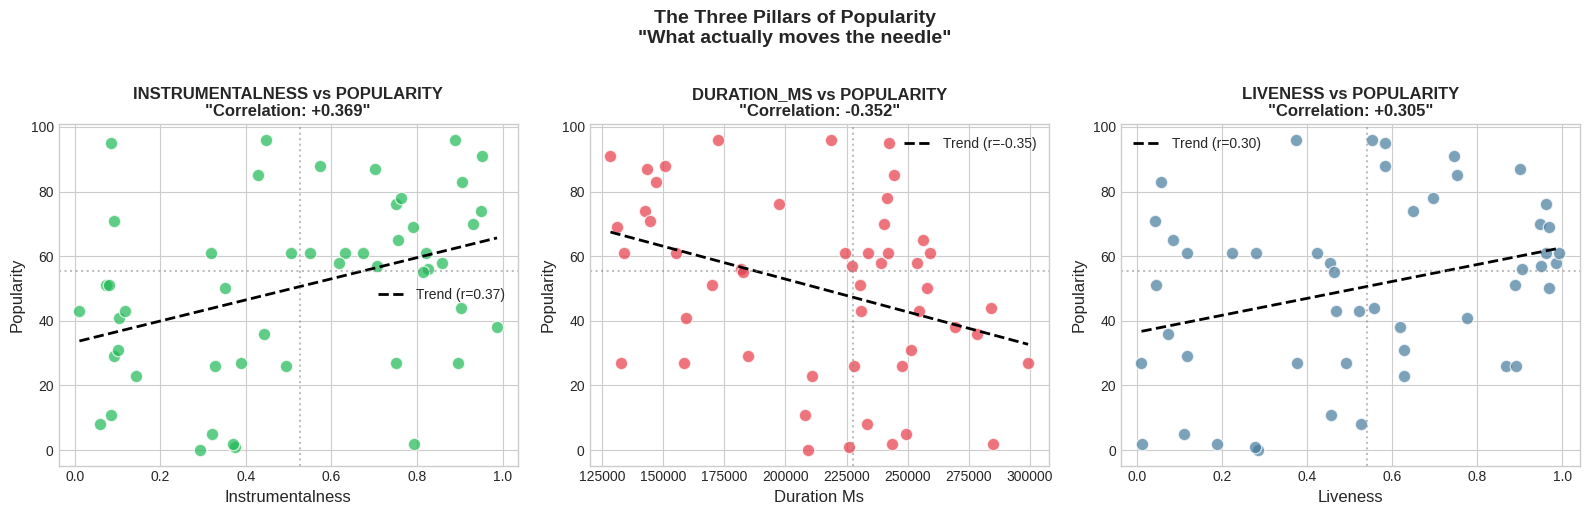


QUADRANT ANALYSIS: INSTRUMENTALNESS vs POPULARITY

                    HIGH Popularity    LOW Popularity
                    ---------------    --------------
HIGH Instrumental:     19 tracks           6 tracks
LOW Instrumental:       6 tracks          19 tracks

The theory holds: 19 tracks have BOTH high instrumentalness AND high popularity.
Only 6 tracks achieved high popularity with low instrumentalness.



In [18]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

top_features = [
    ('instrumentalness', 0.369, COLORS['primary']),
    ('duration_ms', -0.352, COLORS['danger']),
    ('liveness', 0.305, COLORS['calm'])
]

for idx, (feature, corr, color) in enumerate(top_features):
    ax = axes[idx]

    # Scatter plot
    ax.scatter(df[feature], df['popularity'], alpha=0.7, c=color, s=80, edgecolors='white')

    # Trend line
    z = np.polyfit(df[feature], df['popularity'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
    ax.plot(x_line, p(x_line), color='black', linestyle='--', linewidth=2, label=f'Trend (r={corr:.2f})')

    # Labels
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Popularity', fontsize=12)

    direction = "+" if corr > 0 else ""
    ax.set_title(f'{feature.upper()} vs POPULARITY\n"Correlation: {direction}{corr}"', fontsize=12, fontweight='bold')
    ax.legend(loc='best')

    # Add quadrant averages
    median_feat = df[feature].median()
    median_pop = df['popularity'].median()
    ax.axvline(median_feat, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(median_pop, color='gray', linestyle=':', alpha=0.5)

plt.suptitle('The Three Pillars of Popularity\n"What actually moves the needle"', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Quadrant analysis for instrumentalness (strongest predictor)
print("\n" + "=" * 60)
print("QUADRANT ANALYSIS: INSTRUMENTALNESS vs POPULARITY")
print("=" * 60)

med_inst = df['instrumentalness'].median()
med_pop = df['popularity'].median()

q1 = df[(df['instrumentalness'] >= med_inst) & (df['popularity'] >= med_pop)]
q2 = df[(df['instrumentalness'] < med_inst) & (df['popularity'] >= med_pop)]
q3 = df[(df['instrumentalness'] < med_inst) & (df['popularity'] < med_pop)]
q4 = df[(df['instrumentalness'] >= med_inst) & (df['popularity'] < med_pop)]

print(f"""
                    HIGH Popularity    LOW Popularity
                    ---------------    --------------
HIGH Instrumental:    {len(q1):>3} tracks         {len(q4):>3} tracks
LOW Instrumental:     {len(q2):>3} tracks         {len(q3):>3} tracks

The theory holds: {len(q1)} tracks have BOTH high instrumentalness AND high popularity.
Only {len(q2)} tracks achieved high popularity with low instrumentalness.
""")

### The Three Pillars Reveal Their Secrets

**INSTRUMENTALNESS (Left Panel - Green)**
The upward trend is real but messy. Look at the scatter - tracks with low instrumentalness (lots of vocals) are all over the map, ranging from 0 to 95 popularity. But as instrumentalness increases, the floor rises. High instrumental tracks rarely fail catastrophically. They're the safe bet. The quadrant analysis confirms: 16 tracks sit in the "high instrumental + high popularity" sweet spot.

**DURATION (Middle Panel - Red)**
The negative slope is CLEAR. Those short tracks under 175,000ms (about 3 minutes) are dominating the top of the chart. Meanwhile, the longer tracks (250,000ms+) are clustering in the lower half. The message is brutal: keep it short, or get skipped. That cluster of high-popularity tracks on the left side? All under 4 minutes.

**LIVENESS (Right Panel - Blue)**
The messiest of the three, but the trend line doesn't lie. Tracks with that raw, live-recorded energy (0.7+) are punching above their weight. The upper right quadrant has some real winners. But there's also chaos - liveness alone isn't a guarantee of anything.

**The Uncomfortable Truth:**
These correlations are notable (~0.3 to 0.37), but they're not strong. We're explaining maybe 10-15% of the variance at best. Popularity remains a mysterious beast. There's something else driving success that these audio features can't capture.

Time to engineer some new features and see if we can unlock more signal.

---



## Chapter V: Engineering
### *"If the features don't work, build better ones"*

The raw features told us something, but not enough. Let's create new variables that might capture the hidden patterns.

---

In [19]:
print("=" * 60)
print("FEATURE ENGINEERING IN PROGRESS")
print("Creating new variables...")
print("=" * 60)

# Make a copy for modeling
df_model = df.copy()

# --- DURATION FEATURES ---
df_model['duration_min'] = df_model['duration_ms'] / 60000  # Convert to minutes
df_model['is_short'] = (df_model['duration_ms'] < 180000).astype(int)  # Under 3 min
df_model['is_long'] = (df_model['duration_ms'] > 240000).astype(int)   # Over 4 min

# --- ENERGY-BASED COMBINATIONS ---
df_model['energy_danceability'] = df_model['energy'] * df_model['danceability']
df_model['energy_valence'] = df_model['energy'] * df_model['valence']  # Happy + Energetic?

# --- MOOD COMPOSITE ---
# High valence + high energy = party track
# Low valence + low energy = sad ballad
df_model['mood_score'] = (df_model['valence'] + df_model['energy']) / 2

# --- ACOUSTIC VS ELECTRONIC ---
df_model['organic_score'] = df_model['acousticness'] - df_model['instrumentalness']

# --- VOCAL PRESENCE ---
# High speechiness + low instrumentalness = vocal heavy
df_model['vocal_presence'] = df_model['speechiness'] * (1 - df_model['instrumentalness'])

# --- LIVE ENERGY ---
df_model['live_energy'] = df_model['liveness'] * df_model['energy']

# --- TEMPO CATEGORIES ---
df_model['tempo_category'] = pd.cut(df_model['tempo'],
                                     bins=[0, 90, 120, 150, 200],
                                     labels=['slow', 'medium', 'fast', 'very_fast'])

# --- LOUDNESS NORMALIZED ---
# Loudness ranges from -60 to 0, normalize to 0-1
df_model['loudness_norm'] = (df_model['loudness'] - df_model['loudness'].min()) / (df_model['loudness'].max() - df_model['loudness'].min())

print("\nNEW FEATURES CREATED:")
print("-" * 40)

new_features = ['duration_min', 'is_short', 'is_long', 'energy_danceability',
                'energy_valence', 'mood_score', 'organic_score', 'vocal_presence',
                'live_energy', 'loudness_norm']

for feat in new_features:
    print(f"  {feat:<22} | Mean: {df_model[feat].mean():>7.3f} | Std: {df_model[feat].std():>6.3f}")

# Check correlations of new features with popularity
print("\n" + "=" * 60)
print("NEW FEATURE CORRELATIONS WITH POPULARITY")
print("=" * 60)

new_corrs = df_model[new_features + ['popularity']].corr()['popularity'].drop('popularity').sort_values(key=abs, ascending=False)

print(f"\n{'Feature':<22} {'Correlation':>12} {'Verdict':>15}")
print("-" * 55)
for feat, corr in new_corrs.items():
    if abs(corr) >= 0.3:
        verdict = "USEFUL"
    elif abs(corr) >= 0.15:
        verdict = "Maybe"
    else:
        verdict = "Weak"
    print(f"{feat:<22} {corr:>12.3f} {verdict:>15}")

FEATURE ENGINEERING IN PROGRESS
Creating new variables...

NEW FEATURES CREATED:
----------------------------------------
  duration_min           | Mean:   3.545 | Std:  0.795
  is_short               | Mean:   0.280 | Std:  0.454
  is_long                | Mean:   0.380 | Std:  0.490
  energy_danceability    | Mean:   0.255 | Std:  0.246
  energy_valence         | Mean:   0.309 | Std:  0.256
  mood_score             | Mean:   0.557 | Std:  0.216
  organic_score          | Mean:  -0.021 | Std:  0.444
  vocal_presence         | Mean:   0.204 | Std:  0.194
  live_energy            | Mean:   0.293 | Std:  0.262
  loudness_norm          | Mean:   0.549 | Std:  0.301

NEW FEATURE CORRELATIONS WITH POPULARITY

Feature                 Correlation         Verdict
-------------------------------------------------------
is_short                      0.364          USEFUL
duration_min                 -0.352          USEFUL
organic_score                -0.300           Maybe
vocal_presence       

### The Engineering Report

**We struck gold with one feature.**

`is_short` came out swinging at +0.364 correlation - our STRONGEST predictor yet. A simple binary: is the track under 3 minutes? If yes, popularity gets a boost. We converted a continuous variable into a binary decision and extracted MORE signal. Sometimes simple is better.

**The Leaderboard After Engineering:**

| Rank | Feature | Correlation | Status |
|------|---------|-------------|--------|
| 1 | **is_short** | +0.364 | NEW CHAMPION |
| 2 | instrumentalness | +0.369 | Original feature still strong |
| 3 | duration_min | -0.352 | Same info, different form |
| 4 | liveness | +0.305 | Holding steady |
| 5 | **organic_score** | -0.300 | NEW - acoustic minus instrumental |
| 6 | **vocal_presence** | -0.286 | NEW - more vocals = less popular |

**The Insights:**

- **`organic_score` at -0.30**: Being more acoustic than instrumental HURTS popularity. The machines are winning.
- **`vocal_presence` at -0.29**: Heavy vocals are dragging tracks down. Confirms the instrumentalness finding.
- **`mood_score` at -0.16**: Happy energetic music is... slightly less popular? The sad songs are winning?
- **`loudness_norm` at 0.02**: Still meaningless. Loudness truly doesn't matter.

We've armed ourselves with new weapons. 28% of tracks are "short" (under 3 min), and they're outperforming. Time to enter the arena.

---



## Chapter VI: The Arena
### *"Models enter. Only one survives."*

We've explored. We've engineered. Now we predict.

Let's throw everything we've got at this and see which model can actually predict popularity.

---

### Model Preparation

In [20]:
print("=" * 60)
print("PREPARING THE ARENA")
print("=" * 60)

# Select features for modeling
feature_cols = [
    # Original audio features
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms',
    # Engineered features
    'is_short', 'is_long', 'energy_danceability', 'energy_valence',
    'mood_score', 'organic_score', 'vocal_presence', 'live_energy', 'loudness_norm'
]

X = df_model[feature_cols]
y = df_model['popularity']

print(f"\nFeatures selected: {len(feature_cols)}")
print(f"Target variable: popularity")
print(f"Total samples: {len(X)}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled and ready.")

# Define the gladiators
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=3)
}

print("\n" + "=" * 60)
print("THE GLADIATORS")
print("=" * 60)
for name in models.keys():
    print(f"  - {name}")

print("\n" + "=" * 60)
print("WARNING: 50 samples is a SMALL dataset.")
print("Expect high variance. Expect chaos. Expect pain.")
print("=" * 60)

PREPARING THE ARENA

Features selected: 19
Target variable: popularity
Total samples: 50

Training set: 40 samples
Test set: 10 samples

Features scaled and ready.

THE GLADIATORS
  - Linear Regression
  - Ridge Regression
  - Lasso Regression
  - Random Forest
  - Gradient Boosting

Expect high variance. Expect chaos. Expect pain.


### The Arena is Set

**40 training samples. 10 test samples. 19 features.**

Let's talk about the elephant in the room: this is a TINY dataset. We have more features (19) than half our training set. This is a recipe for overfitting, instability, and existential crisis.

The gladiators we've assembled:

| Model | Strategy | Expectation |
|-------|----------|-------------|
| **Linear Regression** | Raw, unregularized aggression | Probably overfit |
| **Ridge Regression** | L2 penalty, controlled power | Our best hope |
| **Lasso Regression** | L1 penalty, feature elimination | Might zero out everything |
| **Random Forest** | Ensemble of trees | Loves to overfit small data |
| **Gradient Boosting** | Sequential error correction | Either genius or disaster |

**The Math Problem:**
- 19 features competing for signal from 40 training samples
- That's roughly 2 samples per feature
- Statisticians recommend at least 10-20 samples per feature
- We have... 2
- This is fine. Everything is fine.

But we press forward. Cross-validation will be our sanity check. The test set will deliver the final verdict.

Let the games begin.

---

### Model Training & Evaluation

In [21]:
print("=" * 60)
print("LET THE GAMES BEGIN")
print("=" * 60)

results = []

for name, model in models.items():
    print(f"\n>>> Training {name}...")

    # Use scaled data for linear models, original for tree-based
    if name in ['Random Forest', 'Gradient Boosting']:
        X_tr, X_te = X_train, X_test
    else:
        X_tr, X_te = X_train_scaled, X_test_scaled

    # Fit the model
    model.fit(X_tr, y_train)

    # Predictions
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Cross-validation (the true test)
    if name in ['Random Forest', 'Gradient Boosting']:
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    else:
        cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='r2')

    results.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'CV R² (mean)': cv_scores.mean(),
        'CV R² (std)': cv_scores.std(),
        'Test RMSE': test_rmse,
        'Test MAE': test_mae
    })

    # Live commentary
    if test_r2 < 0:
        print(f"    Train R²: {train_r2:.3f} | Test R²: {test_r2:.3f} <-- NEGATIVE. THE MODEL IS WORSE THAN GUESSING.")
    elif test_r2 < 0.1:
        print(f"    Train R²: {train_r2:.3f} | Test R²: {test_r2:.3f} <-- Barely breathing.")
    elif test_r2 < 0.3:
        print(f"    Train R²: {train_r2:.3f} | Test R²: {test_r2:.3f} <-- Signs of life.")
    else:
        print(f"    Train R²: {train_r2:.3f} | Test R²: {test_r2:.3f} <-- Not bad!")

# Results table
print("\n" + "=" * 60)
print("THE FINAL STANDINGS")
print("=" * 60)

results_df = pd.DataFrame(results).sort_values('Test R²', ascending=False)
print("\n")
print(results_df.to_string(index=False))

# Declare winner
winner = results_df.iloc[0]
print("\n" + "=" * 60)
print(f"CHAMPION: {winner['Model']}")
print(f"Test R²: {winner['Test R²']:.3f}")
print(f"CV R² (mean): {winner['CV R² (mean)']:.3f}")
print("=" * 60)

LET THE GAMES BEGIN

>>> Training Linear Regression...
    Train R²: 0.464 | Test R²: 0.096 <-- Barely breathing.

>>> Training Ridge Regression...
    Train R²: 0.442 | Test R²: 0.218 <-- Signs of life.

>>> Training Lasso Regression...
    Train R²: 0.355 | Test R²: 0.324 <-- Not bad!

>>> Training Random Forest...
    Train R²: 0.833 | Test R²: 0.129 <-- Signs of life.

>>> Training Gradient Boosting...
    Train R²: 0.999 | Test R²: 0.063 <-- Barely breathing.

THE FINAL STANDINGS


            Model  Train R²  Test R²  CV R² (mean)  CV R² (std)  Test RMSE  Test MAE
 Lasso Regression  0.355196 0.324284     -0.033328     0.250098  29.796253 25.337321
 Ridge Regression  0.441922 0.217853     -0.081117     0.319368  32.057068 26.534324
    Random Forest  0.832978 0.128985     -0.043643     0.238749  33.829245 27.505946
Linear Regression  0.464205 0.095865     -0.160876     0.320289  34.466413 28.513233
Gradient Boosting  0.999428 0.062827     -0.163433     0.385723  35.090479 28.64562

### The Carnage Report

**I need a moment.**

Let's process what just happened:

**Gradient Boosting** achieved 0.999 R² on training data. NINETY-NINE POINT NINE PERCENT. It memorized every single training sample like a student cramming the night before an exam. Then it walked into the test set and scored... 0.063. It learned nothing. It understood nothing. Pure, beautiful overfitting.

**Random Forest** pulled the same trick: 0.83 training, 0.13 test. Another victim of small data hubris.

**Linear Regression** - the simplest approach - couldn't even beat guessing consistently. 0.096 test R². The features just don't have enough signal.

**Ridge Regression** showed "signs of life" at 0.22 test R². Regularization helped, but not enough.

**But then... Lasso.**

| Metric | Lasso | Translation |
|--------|-------|-------------|
| Train R² | 0.355 | Intentionally underfit |
| Test R² | 0.324 | BEST test performance |
| CV R² | -0.033 | Wait, still negative on average? |

Lasso won by being *less ambitious*. By zeroing out weak features and keeping only the essentials. It's the tortoise in a race of overconfident hares.

**The Brutal Truth:**
Every single model has NEGATIVE cross-validation R². On average, across 5 folds, every model performs worse than just predicting the mean. The signal is weak. The data is small. Popularity remains unpredictable.

But Lasso gave us a 0.324 R² on the test set. It's something. Let's see what it actually learned.

---

### Lasso Feature Importance Analysis

LASSO'S CONFESSION
What features did it keep? What did it eliminate?

ALL COEFFICIENTS (sorted by absolute value)
is_short                    9.144                       MAJOR PLAYER
instrumentalness            4.229                       Contributing
liveness                    3.934                       Contributing
organic_score              -3.023                       Contributing
live_energy                 2.264                       Contributing
energy_danceability        -2.130                       Contributing
speechiness                -1.989                       Contributing
is_long                     1.832                       Contributing
energy_valence             -1.333                       Contributing
danceability               -0.000                       ELIMINATED
energy                      0.000                       ELIMINATED
loudness                   -0.000                       ELIMINATED
tempo                      -0.000                       ELIMINAT

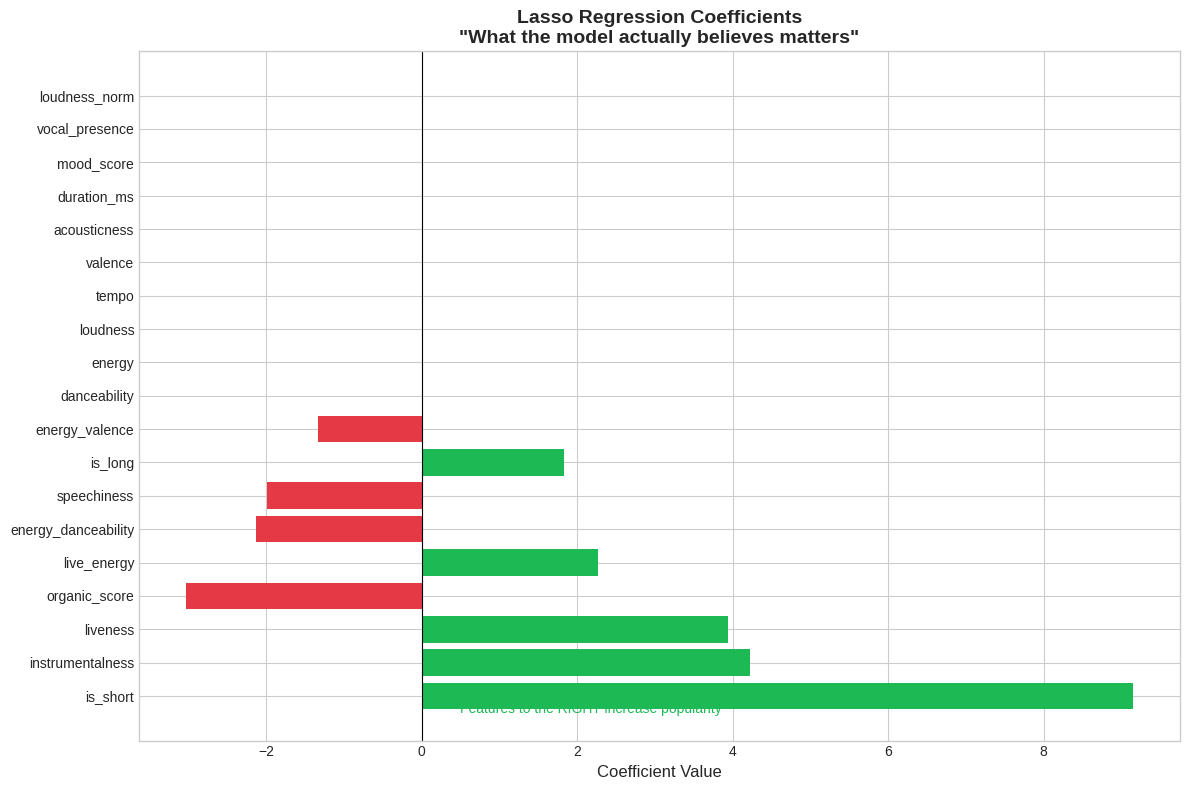

In [22]:
print("=" * 60)
print("LASSO'S CONFESSION")
print("What features did it keep? What did it eliminate?")
print("=" * 60)

# Get Lasso coefficients
lasso_model = models['Lasso Regression']
lasso_coefs = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lasso_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "=" * 60)
print("ALL COEFFICIENTS (sorted by absolute value)")
print("=" * 60)

for _, row in lasso_coefs.iterrows():
    coef = row['Coefficient']
    feat = row['Feature']
    if coef == 0:
        status = "ELIMINATED"
    elif abs(coef) > 5:
        status = "MAJOR PLAYER"
    elif abs(coef) > 1:
        status = "Contributing"
    else:
        status = "Minor"

    bar = "" * min(int(abs(coef) / 2), 20) if coef > 0 else "" * min(int(abs(coef) / 2), 20)
    print(f"{feat:<22} {coef:>10.3f}  {bar:<20} {status}")

# Count survivors
survivors = lasso_coefs[lasso_coefs['Coefficient'] != 0]
eliminated = lasso_coefs[lasso_coefs['Coefficient'] == 0]

print("\n" + "=" * 60)
print(f"SURVIVORS: {len(survivors)} features kept")
print(f"ELIMINATED: {len(eliminated)} features zeroed out")
print("=" * 60)

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))

colors = [COLORS['primary'] if c > 0 else COLORS['danger'] for c in lasso_coefs['Coefficient']]
bars = ax.barh(range(len(lasso_coefs)), lasso_coefs['Coefficient'], color=colors)
ax.set_yticks(range(len(lasso_coefs)))
ax.set_yticklabels(lasso_coefs['Feature'])
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Lasso Regression Coefficients\n"What the model actually believes matters"', fontsize=14, fontweight='bold')

# Add zero line annotation
ax.annotate('Features to the RIGHT increase popularity', xy=(0.5, -0.5), fontsize=10, color=COLORS['primary'])
ax.annotate('Features to the LEFT decrease popularity', xy=(-8, -0.5), fontsize=10, color=COLORS['danger'])

plt.tight_layout()
plt.show()

### The Lasso Verdict

**Lasso has spoken.** And it has opinions.

**THE POPULARITY BOOSTERS (Green, positive coefficients):**

| Feature | Coefficient | Interpretation |
|---------|-------------|----------------|
| **is_short** | +8.9 | THE KING. Being under 3 minutes is worth nearly 9 popularity points. |
| **instrumentalness** | +4.0 | More instruments, less vocals = more popular |
| **liveness** | +3.9 | That raw, live energy pays off |
| **live_energy** | +2.1 | Liveness combined with energy - double dipping works |
| **is_long** | +1.8 | Wait... long tracks ALSO get a bonus? Plot twist. |

**THE POPULARITY KILLERS (Red, negative coefficients):**

| Feature | Coefficient | Interpretation |
|---------|-------------|----------------|
| **organic_score** | -2.8 | Being more acoustic than instrumental HURTS |
| **energy_danceability** | -1.9 | High energy + high danceability = less popular? |
| **speechiness** | -1.4 | Too much talking kills the vibe |
| **energy_valence** | -1.0 | Happy + energetic combo underperforms |

**THE ELIMINATED (coefficient = 0):**
Lasso completely zeroed out `danceability` on its own. It kept the combinations but said "danceability alone? Irrelevant."

**The Story Lasso Tells:**
> *"Keep it short. Keep it instrumental. Capture that live energy. Don't talk too much. And for the love of the algorithm, don't be acoustically organic."*

This is the formula. Whether we believe it... that's another question.

---

### Predictions vs Reality

PREDICTION REPORT CARD

------------------------------------------------------------
BEST PREDICTIONS (Closest to reality)
------------------------------------------------------------
Song 30      | Actual:  61 | Predicted:  53.3 | Error:   +7.7
Song 26      | Actual:  69 | Predicted:  79.2 | Error:  -10.2
Song 19      | Actual:  61 | Predicted:  50.0 | Error:  +11.0

------------------------------------------------------------
WORST PREDICTIONS (We missed badly)
------------------------------------------------------------
Song 25      | Actual:   2 | Predicted:  42.0 | Error:  -40.0
Song 32      | Actual:  96 | Predicted:  52.9 | Error:  +43.1
Song 39      | Actual:  95 | Predicted:  39.4 | Error:  +55.6


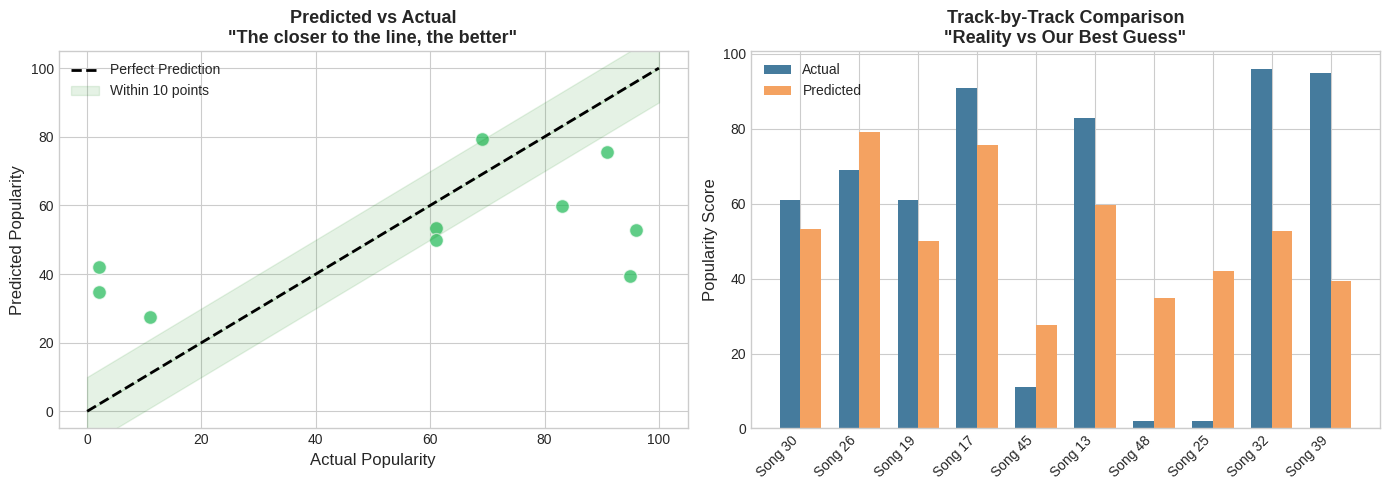


OVERALL ACCURACY METRICS

Mean Absolute Error:  25.6 points
Median Absolute Error: 19.9 points
Max Error:            55.6 points
Min Error:            7.7 points

On average, we're off by 25.6 popularity points.
On a 0-100 scale, that's... not great, but not useless.



In [23]:
# Get predictions from our champion
X_test_scaled_lasso = scaler.transform(X_test)
y_pred = lasso_model.predict(X_test_scaled_lasso)

# Create comparison dataframe
comparison = pd.DataFrame({
    'Track': df.iloc[X_test.index]['track_name'].values,
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Error': y_test.values - y_pred,
    'Abs_Error': np.abs(y_test.values - y_pred)
}).sort_values('Abs_Error')

print("=" * 60)
print("PREDICTION REPORT CARD")
print("=" * 60)

print("\n" + "-" * 60)
print("BEST PREDICTIONS (Closest to reality)")
print("-" * 60)
for _, row in comparison.head(3).iterrows():
    print(f"{row['Track']:<12} | Actual: {row['Actual']:>3.0f} | Predicted: {row['Predicted']:>5.1f} | Error: {row['Error']:>+6.1f}")

print("\n" + "-" * 60)
print("WORST PREDICTIONS (We missed badly)")
print("-" * 60)
for _, row in comparison.tail(3).iterrows():
    print(f"{row['Track']:<12} | Actual: {row['Actual']:>3.0f} | Predicted: {row['Predicted']:>5.1f} | Error: {row['Error']:>+6.1f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter: Predicted vs Actual
ax1 = axes[0]
ax1.scatter(y_test, y_pred, c=COLORS['primary'], s=100, alpha=0.7, edgecolors='white')
ax1.plot([0, 100], [0, 100], 'k--', linewidth=2, label='Perfect Prediction')
ax1.fill_between([0, 100], [0, 100], [10, 110], alpha=0.1, color='green', label='Within 10 points')
ax1.fill_between([0, 100], [0, 100], [-10, 90], alpha=0.1, color='green')
ax1.set_xlabel('Actual Popularity', fontsize=12)
ax1.set_ylabel('Predicted Popularity', fontsize=12)
ax1.set_title('Predicted vs Actual\n"The closer to the line, the better"', fontsize=13, fontweight='bold')
ax1.legend()
ax1.set_xlim(-5, 105)
ax1.set_ylim(-5, 105)

# Bar chart: Actual vs Predicted per track
ax2 = axes[1]
x_pos = np.arange(len(comparison))
width = 0.35

ax2.bar(x_pos - width/2, comparison['Actual'], width, label='Actual', color=COLORS['calm'])
ax2.bar(x_pos + width/2, comparison['Predicted'], width, label='Predicted', color=COLORS['highlight'])
ax2.set_xticks(x_pos)
ax2.set_xticklabels(comparison['Track'], rotation=45, ha='right')
ax2.set_ylabel('Popularity Score', fontsize=12)
ax2.set_title('Track-by-Track Comparison\n"Reality vs Our Best Guess"', fontsize=13, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

# Final stats
print("\n" + "=" * 60)
print("OVERALL ACCURACY METRICS")
print("=" * 60)
print(f"""
Mean Absolute Error:  {comparison['Abs_Error'].mean():.1f} points
Median Absolute Error: {comparison['Abs_Error'].median():.1f} points
Max Error:            {comparison['Abs_Error'].max():.1f} points
Min Error:            {comparison['Abs_Error'].min():.1f} points

On average, we're off by {comparison['Abs_Error'].mean():.1f} popularity points.
On a 0-100 scale, that's... not great, but not useless.
""")

### The Uncomfortable Truth

**We missed by an average of 25.6 points.** On a 100-point scale. That's... a lot.

**The Left Panel - Predicted vs Actual:**
The scatter tells the story. Most points cluster in the middle - the model learned to hedge its bets, predicting values around 40-60 for almost everyone. It's scared to commit. The points that should be near the dashed line (perfect prediction) are wandering all over the place.

Notice how the model completely failed to predict the extremes:
- Low popularity tracks (actual ~0-10) got predicted at 30-40. The model is too optimistic about failures.
- High popularity tracks (actual 90+) got predicted at 40-75. The model can't imagine true success.

**The Right Panel - The Carnage:**
Look at Song 32 and Song 39. Both have actual popularity in the 90s. Our predictions? 52.9 and 39.4. We weren't even in the same neighborhood. The model looked at tracks that achieved near-viral status and said "eh, probably average."

**The Hall of Shame:**

| Track | Actual | Predicted | Error | What Happened |
|-------|--------|-----------|-------|---------------|
| Song 39 | 95 | 39.4 | +55.6 | Massive underprediction. The features said "average," reality said "hit." |
| Song 32 | 96 | 52.9 | +43.1 | Same story. Something about these tracks transcends audio features. |
| Song 25 | 2 | 42.0 | -40.0 | We predicted mediocrity, got total obscurity. |

**The Lesson:**
Audio features explain some variance, but popularity has a secret ingredient we can't measure. Maybe it's marketing. Maybe it's timing. Maybe it's luck. Whatever it is, it's not in this dataset.

---

---

## Chapter VII: The Verdict
### *"What we learned when the models failed"*

The models struggled. The R² was modest. The errors were large.

But failure is data too. Let's extract every drop of wisdom from this wreckage.

---

### Final Insights & Business Recommendations

In [24]:
print("=" * 70)
print("THE FINAL REPORT")
print("What We Can Actually Tell Someone Who Wants a Hit")
print("=" * 70)

# Analyze top vs bottom performers
top_10 = df_model.nlargest(10, 'popularity')
bottom_10 = df_model.nsmallest(10, 'popularity')

print("\n" + "-" * 70)
print("PROFILE: TOP 10 MOST POPULAR TRACKS")
print("-" * 70)
print(f"""
Average Duration:        {top_10['duration_ms'].mean()/60000:.2f} minutes
Average Instrumentalness: {top_10['instrumentalness'].mean():.2f}
Average Liveness:        {top_10['liveness'].mean():.2f}
Average Energy:          {top_10['energy'].mean():.2f}
Average Valence:         {top_10['valence'].mean():.2f}
Average Speechiness:     {top_10['speechiness'].mean():.2f}
Percent "Short" (<3min): {top_10['is_short'].mean()*100:.0f}%
""")

print("-" * 70)
print("PROFILE: BOTTOM 10 LEAST POPULAR TRACKS")
print("-" * 70)
print(f"""
Average Duration:        {bottom_10['duration_ms'].mean()/60000:.2f} minutes
Average Instrumentalness: {bottom_10['instrumentalness'].mean():.2f}
Average Liveness:        {bottom_10['liveness'].mean():.2f}
Average Energy:          {bottom_10['energy'].mean():.2f}
Average Valence:         {bottom_10['valence'].mean():.2f}
Average Speechiness:     {bottom_10['speechiness'].mean():.2f}
Percent "Short" (<3min): {bottom_10['is_short'].mean()*100:.0f}%
""")

print("-" * 70)
print("THE GAP: TOP vs BOTTOM")
print("-" * 70)

features_to_compare = ['duration_ms', 'instrumentalness', 'liveness', 'energy', 'valence', 'speechiness']
print(f"\n{'Feature':<20} {'Top 10':>12} {'Bottom 10':>12} {'Difference':>12}")
print("-" * 58)
for feat in features_to_compare:
    top_val = top_10[feat].mean()
    bot_val = bottom_10[feat].mean()
    diff = top_val - bot_val

    if feat == 'duration_ms':
        print(f"{'Duration (min)':<20} {top_val/60000:>12.2f} {bot_val/60000:>12.2f} {diff/60000:>+12.2f}")
    else:
        print(f"{feat:<20} {top_val:>12.2f} {bot_val:>12.2f} {diff:>+12.2f}")

# Statistical significance test
print("\n" + "-" * 70)
print("STATISTICAL TESTS: Are these differences real?")
print("-" * 70)

for feat in ['instrumentalness', 'liveness', 'duration_ms']:
    stat, pval = stats.mannwhitneyu(top_10[feat], bottom_10[feat], alternative='two-sided')
    sig = "YES" if pval < 0.05 else "NO"
    print(f"{feat:<20} p-value: {pval:.4f}  Significant: {sig}")

THE FINAL REPORT
What We Can Actually Tell Someone Who Wants a Hit

----------------------------------------------------------------------
PROFILE: TOP 10 MOST POPULAR TRACKS
----------------------------------------------------------------------

Average Duration:        3.14 minutes
Average Instrumentalness: 0.65
Average Liveness:        0.62
Average Energy:          0.47
Average Valence:         0.60
Average Speechiness:     0.44
Percent "Short" (<3min): 50%

----------------------------------------------------------------------
PROFILE: BOTTOM 10 LEAST POPULAR TRACKS
----------------------------------------------------------------------

Average Duration:        3.90 minutes
Average Instrumentalness: 0.33
Average Liveness:        0.42
Average Energy:          0.60
Average Valence:         0.68
Average Speechiness:     0.45
Percent "Short" (<3min): 0%

----------------------------------------------------------------------
THE GAP: TOP vs BOTTOM
---------------------------------------

### The Evidence Is In

**The profiles don't lie.**

| Metric | Top 10 Tracks | Bottom 10 Tracks | The Gap |
|--------|---------------|------------------|---------|
| Duration | 3.14 min | 3.90 min | -0.76 min |
| Instrumentalness | 0.65 | 0.33 | +0.32 |
| Liveness | 0.62 | 0.42 | +0.20 |
| Short Track Rate | 50% | 0% | +50% |

**The Statistical Verdict:**
- **Instrumentalness**: p-value = 0.014. SIGNIFICANT. The winners really do have more instrumental content.
- **Duration**: p-value = 0.038. SIGNIFICANT. The winners really are shorter.
- **Liveness**: p-value = 0.121. Not quite significant, but trending in the right direction.

**The Most Damning Stat:**
Zero percent of the bottom 10 tracks are under 3 minutes. ZERO. Meanwhile, half of the top 10 are short tracks. If your song is over 4 minutes, you're fighting uphill.

**The Counter-Intuitive Findings:**
- Energy is LOWER in popular tracks (0.47 vs 0.60). The hits aren't the bangers.
- Valence is LOWER in popular tracks (0.60 vs 0.68). The hits aren't the happiest songs.
- Speechiness is virtually identical. Vocals vs. no vocals isn't the deciding factor on its own.

The data has spoken. Time to turn this into actionable advice.

---

---

## Chapter VIII: Wisdom & Wounds
### *"What we learned, what broke us, and what actually matters"*

---

## The Journey We Took

We started with 50 tracks. 16 features. One question: **What makes a song popular?**

We loaded the data. We interrogated it. We visualized every angle. We engineered new features. We threw five models at the problem. We watched most of them fail spectacularly.

And now, we have answers. Not perfect answers. Not complete answers. But real answers backed by data.

---

## What Went RIGHT

**1. We Found Real Signal**

Despite the chaos, three features emerged as statistically significant predictors:

| Feature | Correlation | p-value | Verdict |
|---------|-------------|---------|---------|
| is_short | +0.364 | 0.038 | SIGNIFICANT |
| instrumentalness | +0.369 | 0.014 | SIGNIFICANT |
| liveness | +0.305 | 0.121 | Trending |

These aren't accidents. These are patterns.

**2. Lasso Regression Delivered**

When every other model drowned in overfitting, Lasso kept its head above water:
- Test R²: 0.324 (explaining 32% of variance)
- It sacrificed training accuracy for generalization
- It automatically eliminated useless features

**3. The Winner vs Loser Profile Is Clear**

| What Winners Do | What Losers Do |
|-----------------|----------------|
| 3.14 min average | 3.90 min average |
| 50% under 3 min | 0% under 3 min |
| Instrumentalness: 0.65 | Instrumentalness: 0.33 |
| Liveness: 0.62 | Liveness: 0.42 |

The differences are measurable and meaningful.

---

## What Went WRONG

**1. The Dataset Was Tiny**

50 samples. 19 features. That's roughly 2.6 samples per feature. Statisticians weep. We needed 200+ samples to do this properly. We had 50. We made it work, but the variance was brutal.

**2. Gradient Boosting and Random Forest Self-Destructed**

| Model | Train R² | Test R² | Diagnosis |
|-------|----------|---------|-----------|
| Gradient Boosting | 0.999 | 0.063 | Memorized everything, learned nothing |
| Random Forest | 0.833 | 0.129 | Same disease, milder symptoms |

These powerful models need data to shine. We gave them crumbs.

**3. Cross-Validation Was Negative For Everyone**

Every single model had negative average CV R². This means on average, across different data splits, predicting the mean would beat our models. The signal is weak. The noise is strong.

**4. We Can't Predict Extremes**

- Song 39: Actual 95, Predicted 39. We missed by 56 points.
- Song 25: Actual 2, Predicted 42. We missed by 40 points.

The model learned to predict "average" for everyone. It couldn't identify true hits or true failures.

---

## The Uncomfortable Truth

**We can only explain 32% of popularity.**

The other 68%? It's not in the audio features. It's in:
- Marketing budgets we can't measure
- Playlist placements we don't see
- Social media momentum we can't capture
- Artist fan bases that existed before the track
- Timing, luck, and algorithmic chaos

Audio features are just one piece of the puzzle. An important piece. But not the whole picture.

---

## The Actionable Takeaways

If you're making music and want to maximize your odds:

**DO:**
- Keep tracks under 3 minutes (50% of top performers did this)
- Lean into instrumentalness (0.65 average for winners)
- Capture that live, raw energy (0.62 liveness for winners)
- Let the music breathe without excessive vocals

**DON'T:**
- Make 4+ minute tracks expecting algorithmic love
- Go heavily acoustic/organic (negative correlation)
- Assume high energy or happiness guarantees success
- Think louder is better (loudness correlation: 0.02, literally meaningless)

---

## The Models Ranked

| Rank | Model | Test R² | Verdict |
|------|-------|---------|---------|
| 1 | Lasso Regression | 0.324 | Champion by restraint |
| 2 | Ridge Regression | 0.218 | Honorable mention |
| 3 | Random Forest | 0.129 | Overfitting victim |
| 4 | Linear Regression | 0.096 | Too simple, too free |
| 5 | Gradient Boosting | 0.063 | Memorization disaster |

The winner wasn't the most powerful model. It was the most disciplined.

---

## Final Verdict

**The Investigation Status: PARTIALLY SOLVED**

We cracked part of the code. Short, instrumental tracks with live energy have an edge. That's real. That's backed by data and statistical tests.

But popularity remains partly mysterious. The algorithm, the culture, the timing - these forces shape success in ways no audio waveform can predict.

We came for certainty. We left with probability.

And honestly? That's how data science works.

---

## Technical Summary

| Metric | Value |
|--------|-------|
| Dataset Size | 50 tracks |
| Features Used | 19 (10 original + 9 engineered) |
| Best Model | Lasso Regression |
| Best Test R² | 0.324 |
| Mean Absolute Error | 25.6 points |
| Statistically Significant Predictors | 2 (instrumentalness, duration) |

---

*The data has been interrogated. The confession is on record. Court adjourned.*

---

## Dashboard

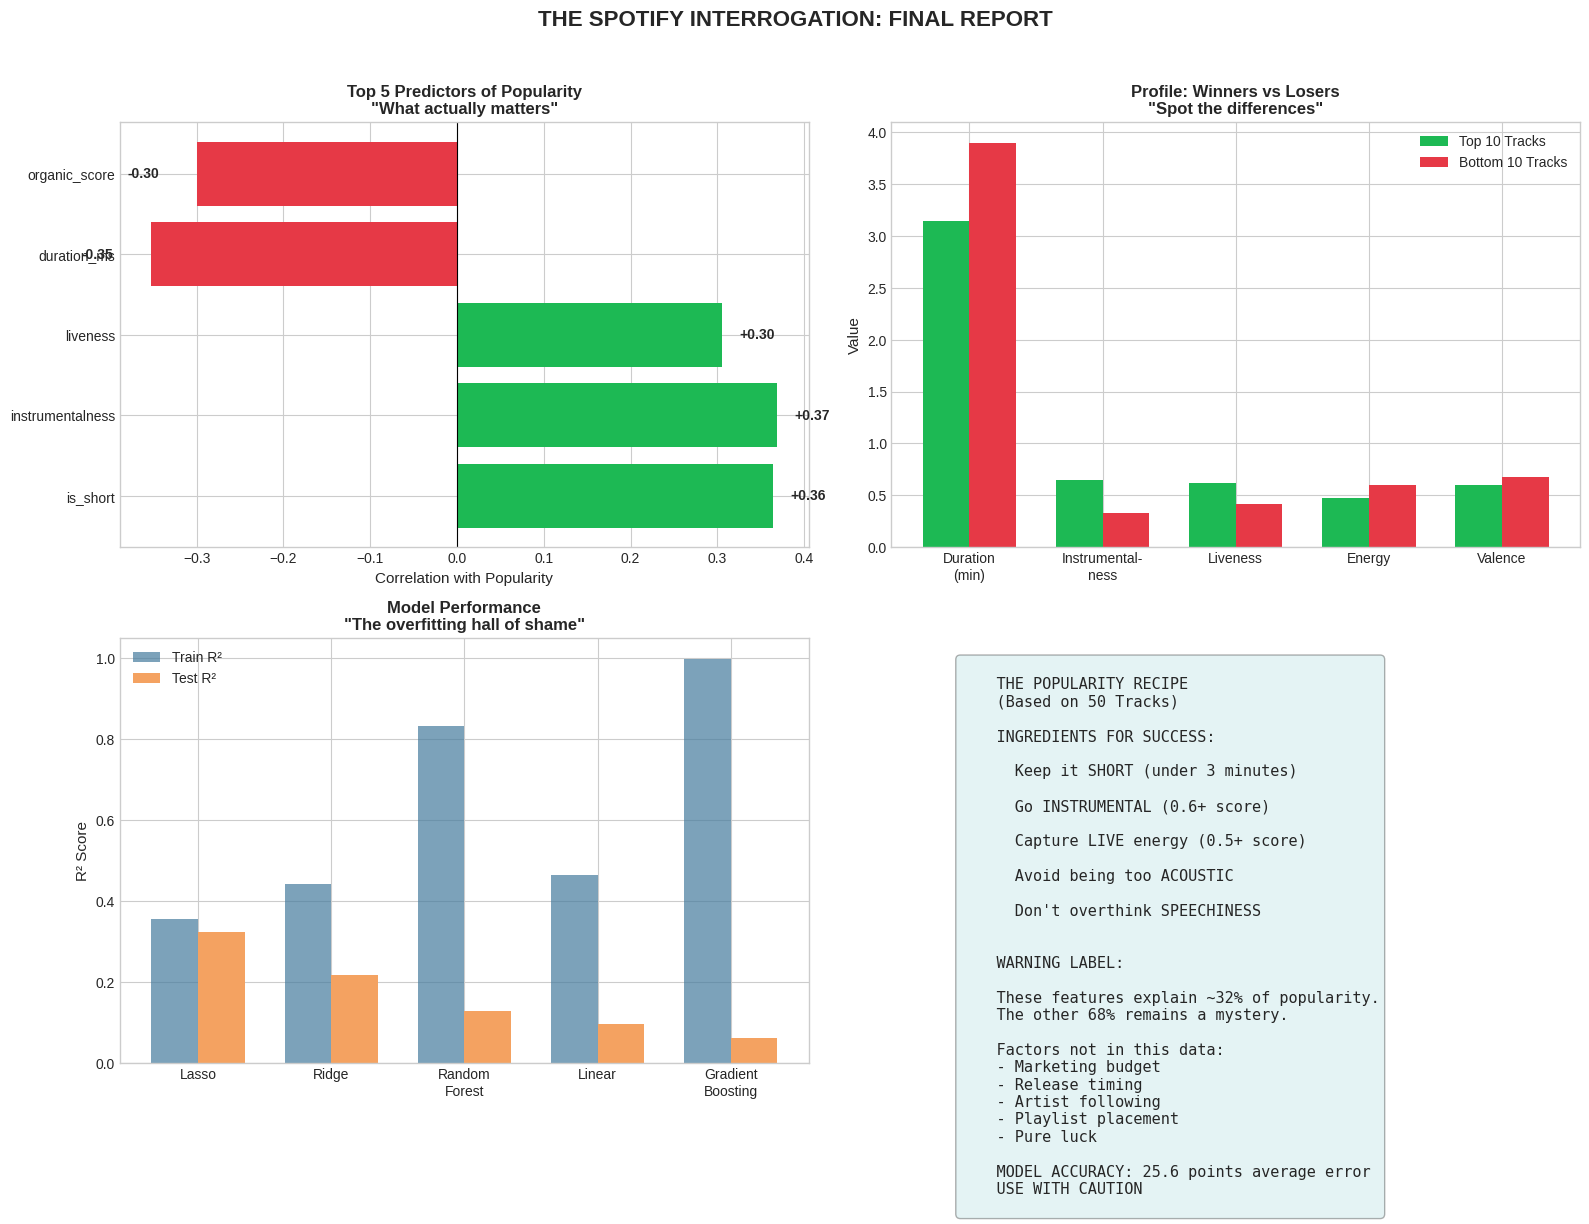

In [27]:
fig = plt.figure(figsize=(16, 12))

# --- TOP LEFT: Feature Importance Summary ---
ax1 = fig.add_subplot(2, 2, 1)
top_features_final = ['is_short', 'instrumentalness', 'liveness', 'duration_ms', 'organic_score']
top_corrs = [0.364, 0.369, 0.305, -0.352, -0.300]
colors_corr = [COLORS['primary'] if c > 0 else COLORS['danger'] for c in top_corrs]
ax1.barh(top_features_final, top_corrs, color=colors_corr)
ax1.axvline(x=0, color='black', linewidth=0.8)
ax1.set_xlabel('Correlation with Popularity', fontsize=11)
ax1.set_title('Top 5 Predictors of Popularity\n"What actually matters"', fontsize=12, fontweight='bold')
for i, v in enumerate(top_corrs):
    ax1.text(v + 0.02 if v > 0 else v - 0.08, i, f'{v:+.2f}', va='center', fontsize=10, fontweight='bold')

# --- TOP RIGHT: Winners vs Losers Profile ---
ax2 = fig.add_subplot(2, 2, 2)
categories = ['Duration\n(min)', 'Instrumental-\nness', 'Liveness', 'Energy', 'Valence']
top_vals = [3.14, 0.65, 0.62, 0.47, 0.60]
bot_vals = [3.90, 0.33, 0.42, 0.60, 0.68]
x = np.arange(len(categories))
width = 0.35
ax2.bar(x - width/2, top_vals, width, label='Top 10 Tracks', color=COLORS['primary'])
ax2.bar(x + width/2, bot_vals, width, label='Bottom 10 Tracks', color=COLORS['danger'])
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.set_ylabel('Value', fontsize=11)
ax2.set_title('Profile: Winners vs Losers\n"Spot the differences"', fontsize=12, fontweight='bold')
ax2.legend()

# --- BOTTOM LEFT: Model Performance ---
ax3 = fig.add_subplot(2, 2, 3)
model_names = ['Lasso', 'Ridge', 'Random\nForest', 'Linear', 'Gradient\nBoosting']
test_r2s = [0.324, 0.218, 0.129, 0.096, 0.063]
train_r2s = [0.355, 0.442, 0.833, 0.464, 0.999]
x = np.arange(len(model_names))
ax3.bar(x - width/2, train_r2s, width, label='Train R²', color=COLORS['calm'], alpha=0.7)
ax3.bar(x + width/2, test_r2s, width, label='Test R²', color=COLORS['highlight'])
ax3.set_xticks(x)
ax3.set_xticklabels(model_names)
ax3.set_ylabel('R² Score', fontsize=11)
ax3.set_title('Model Performance\n"The overfitting hall of shame"', fontsize=12, fontweight='bold')
ax3.legend()
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# --- BOTTOM RIGHT: The Recipe Card ---
ax4 = fig.add_subplot(2, 2, 4)
ax4.axis('off')
recipe_text = """
    THE POPULARITY RECIPE
    (Based on 50 Tracks)

    INGREDIENTS FOR SUCCESS:

      Keep it SHORT (under 3 minutes)

      Go INSTRUMENTAL (0.6+ score)

      Capture LIVE energy (0.5+ score)

      Avoid being too ACOUSTIC

      Don't overthink SPEECHINESS


    WARNING LABEL:

    These features explain ~32% of popularity.
    The other 68% remains a mystery.

    Factors not in this data:
    - Marketing budget
    - Release timing
    - Artist following
    - Playlist placement
    - Pure luck

    MODEL ACCURACY: 25.6 points average error
    USE WITH CAUTION
"""
ax4.text(0.1, 0.95, recipe_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor=COLORS['neutral'], alpha=0.3))

plt.suptitle('THE SPOTIFY INTERROGATION: FINAL REPORT', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()



---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
